NAME: ROMIT RAJ

ROLL NO: 2011MT16

M.TECH MECHATRONICS 2020

# EXPLORATORY DATA ANALYSIS


*   IBM
*   APPLE

*   FACEBOOK
*   GOOGLE





In [ ]:
#import libraries
import pandas as pd
import numpy as np
from numpy import array
from pandas_datareader import data as pdr
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## IBM

 LOAD DATASET

In [ ]:
ibm = pdr.DataReader('IBM', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))
ibm.to_csv('IBM_stock.csv', sep=',')
ibm = ibm.reset_index()

In [ ]:
ibm.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-08-01,191.500000,188.860001,190.500000,189.149994,5181100.0,143.561371
1,2014-08-04,189.949997,188.600006,189.350006,189.639999,2125900.0,143.933304
2,2014-08-05,189.199997,186.440002,188.750000,187.100006,3307900.0,142.005493
3,2014-08-06,186.880005,184.440002,185.360001,185.970001,3847000.0,141.982544
4,2014-08-07,186.679993,183.580002,186.639999,184.300003,2708600.0,140.707535


In [ ]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       589 non-null    datetime64[ns]
 1   High       589 non-null    float64       
 2   Low        589 non-null    float64       
 3   Open       589 non-null    float64       
 4   Close      589 non-null    float64       
 5   Volume     589 non-null    float64       
 6   Adj Close  589 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 32.3 KB


In [ ]:
ibm.describe()

,High,Low,Open,Close,Volume,Adj Close
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02,589.000000
mean,157.737182,155.463786,156.583566,156.617402,4.244832e+06,123.461819
std,15.227783,15.364561,15.325756,15.263828,2.246524e+06,10.790073
min,119.660004,116.900002,118.459999,117.849998,1.415800e+06,94.504570
25%,148.649994,146.449997,147.610001,147.889999,2.962400e+06,117.349693
50%,158.369995,155.679993,157.070007,156.949997,3.725400e+06,124.090508
75%,164.000000,161.830002,162.770004,162.880005,4.701400e+06,129.907471
max,195.000000,193.190002,194.539993,194.000000,2.341650e+07,148.113205


 PLOT ALL THE COLUMN

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb268c04ad0>,
      dtype=object)

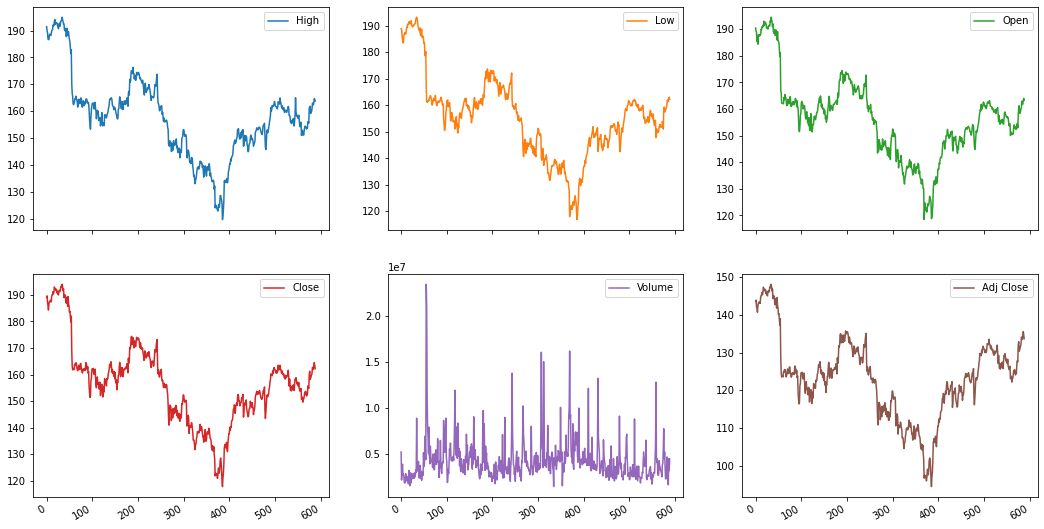

In [ ]:
ibm.drop("Date",axis = 1).plot(subplots = True,layout=(2,3),figsize = (18,10))

for analysis of stock price i'm taking close price of stock

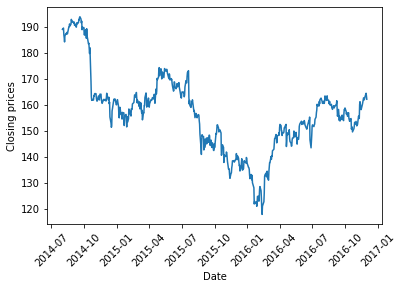

In [ ]:
plt.plot(ibm["Date"],ibm["Close"])
plt.xlabel('Date')
plt.ylabel('Closing prices')
plt.xticks(rotation=45)
plt.show()

analysing different component of time series

<Figure size 432x288 with 0 Axes>

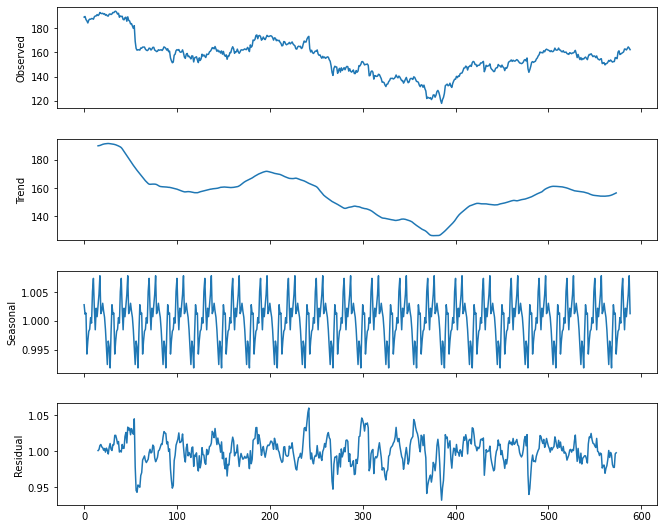

In [ ]:
result = seasonal_decompose(ibm["Close"], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(10, 8)

from above plot there is both trend and seasonal component in price

 STATIONARITY CHECKS

In [ ]:
def adf_test(atr):
  timeseries = ibm[atr].dropna()
  print ('Results of Dickey-Fuller Test for ',atr,'\n')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

adf_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -2.279273
p-value                          0.178740
#Lags Used                       0.000000
Number of Observations Used    588.000000
Critical Value (1%)             -3.441520
Critical Value (5%)             -2.866468
Critical Value (10%)            -2.569394
dtype: float64


In [ ]:
#define KPSS
def kpss_test(atr,**kw):
  timeseries = ibm[atr].dropna()
  print ('Results of KPSS Test for ',atr)
  kpsstest = kpss(timeseries, regression = "ct")
  kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
  for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
  print (kpss_output)
kpss_test('Close')

Results of KPSS Test for  Close
Test Statistic            0.428348
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


from ADF: p value is greater than 0.05

from KPSS: p value is less than 0.05

hence data is NON STATIONARY

ACF AND PACF PLOTS

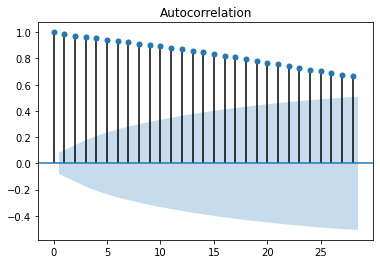

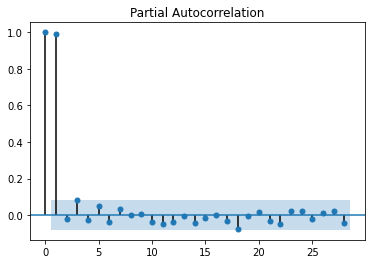

In [ ]:
# plot acf and pacf graph
plot_acf(ibm['Close'])
plot_pacf(ibm['Close'])
plt.show()

also from ACF and PACF plot data is NON STATIONARY

 CONVERT TO STATIONARY

taking 1st difference

In [ ]:
ibm['diff'] = ibm['Close'].diff(periods=1)

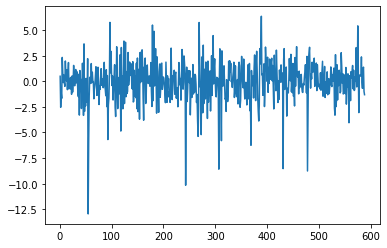

In [ ]:
ibm["diff"].plot()

In [ ]:
adf_test('diff')

Results of Dickey-Fuller Test for  diff 

Test Statistic                -1.843371e+01
p-value                        2.166547e-30
#Lags Used                     1.000000e+00
Number of Observations Used    5.860000e+02
Critical Value (1%)           -3.441558e+00
Critical Value (5%)           -2.866485e+00
Critical Value (10%)          -2.569403e+00
dtype: float64


In [ ]:
kpss_test("diff")

Results of KPSS Test for  diff
Test Statistic            0.045403
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


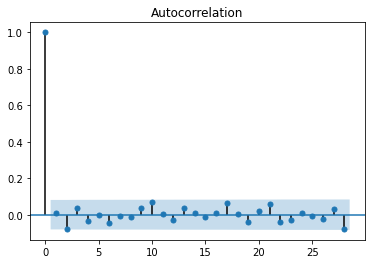

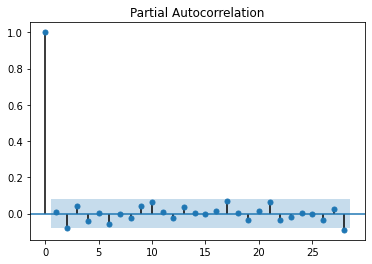

In [ ]:
plot_acf(ibm['diff'].dropna())
plot_pacf(ibm['diff'].dropna())
plt.show()

from ADF and KPSS test and also from ACF and PACF 

difference data is STATIONARY

 CHECKS FOR OUTLIERS

In [ ]:
def out_iqr(df , column):
  global lower,upper
  q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
  # calculate the IQR
  iqr = q75 - q25
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  # calculate the lower and upper bound value
  lower, upper = q25 - cut_off, q75 + cut_off
  print('The IQR is',iqr)
  print('The lower bound value is', lower)
  print('The upper bound value is', upper)
  # Calculate the number of records below and above lower and above bound value respectively
  df1 = df[df[column] > upper]
  df2 = df[df[column] < lower]
  return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [ ]:
out_iqr(ibm,'Close')

The IQR is 14.990005493164062
The lower bound value is 125.40499114990234
The upper bound value is 185.3650131225586
Total number of outliers are 65


 from IQR we get 65 outliers and that can also be seen through box plot

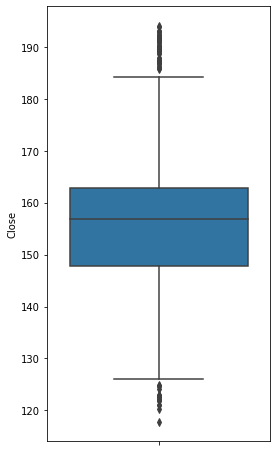

In [ ]:
# box plot
plt.figure(figsize = (4,8))
sns.boxplot(y = ibm.Close)

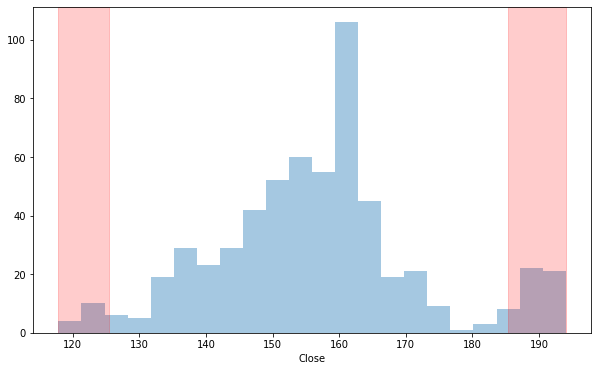

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(ibm.Close, kde=False)
plt.axvspan(xmin = lower,xmax= ibm.Close.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= ibm.Close.max(),alpha=0.2, color='red')

data under red region are seems to be outlier but as we know stock prices varies very frequent so these can be included in data.

## APPLE

 LOAD DATASET

In [ ]:
appl = pdr.DataReader('AAPL', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))
appl.to_csv('aapl_stock.csv', sep=',')
appl = appl.reset_index()

In [ ]:
appl.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-08-01,24.155001,23.702499,23.725000,24.032499,194044000.0,21.657644
1,2014-08-04,24.145000,23.792500,24.092501,23.897499,159832000.0,21.535982
2,2014-08-05,23.920000,23.590000,23.840000,23.780001,223732000.0,21.430096
3,2014-08-06,23.870001,23.677500,23.687500,23.740000,154232000.0,21.394049
4,2014-08-07,23.987499,23.525000,23.732500,23.620001,186844000.0,21.391787


In [ ]:
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       589 non-null    datetime64[ns]
 1   High       589 non-null    float64       
 2   Low        589 non-null    float64       
 3   Open       589 non-null    float64       
 4   Close      589 non-null    float64       
 5   Volume     589 non-null    float64       
 6   Adj Close  589 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 32.3 KB


In [ ]:
appl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02,589.000000
mean,27.992016,27.478374,27.743353,27.738748,1.891853e+08,25.586068
std,2.712822,2.695806,2.718831,2.700132,8.425158e+07,2.418740
min,22.917500,22.367500,22.500000,22.584999,4.590360e+07,21.134403
25%,25.547501,25.125000,25.327499,25.330000,1.311576e+08,23.305397
50%,27.969999,27.352501,27.657499,27.610001,1.733648e+08,25.591351
75%,29.807501,29.250000,29.497499,29.570000,2.243016e+08,27.354954
max,33.634998,32.849998,33.615002,33.250000,7.593852e+08,30.384638


 PLOT ALL THE COLUMN

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb268ac8950>,
      dtype=object)

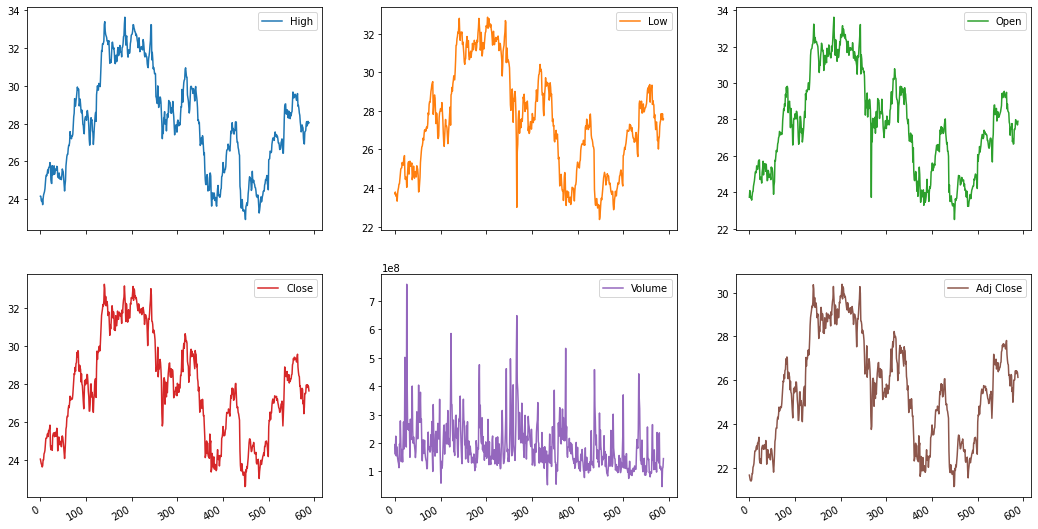

In [ ]:
appl.drop("Date",axis = 1).plot(subplots = True,layout=(2,3),figsize = (18,10))

for analysis of stock price i'm taking close price of stock

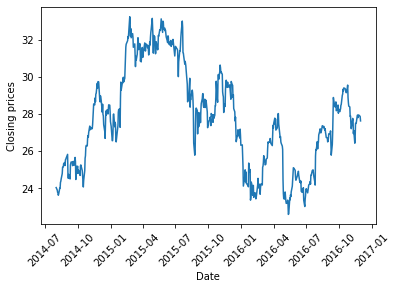

In [ ]:
plt.plot(appl["Date"],appl["Close"])
plt.xlabel('Date')
plt.ylabel('Closing prices')
plt.xticks(rotation=45)
plt.show()

analysing different component of time series

<Figure size 432x288 with 0 Axes>

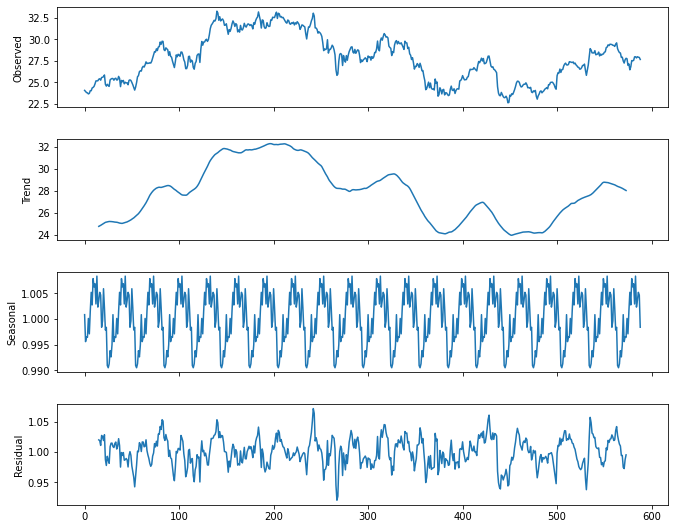

In [ ]:
result = seasonal_decompose(appl["Close"], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(10, 8)

from above plot there is both trend and seasonal component in price

 STATIONARITY CHECKS

In [ ]:
def adf_test(atr):
  timeseries = appl[atr].dropna()
  print ('Results of Dickey-Fuller Test for ',atr,'\n')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

adf_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -2.170605
p-value                          0.217087
#Lags Used                       0.000000
Number of Observations Used    588.000000
Critical Value (1%)             -3.441520
Critical Value (5%)             -2.866468
Critical Value (10%)            -2.569394
dtype: float64


In [ ]:
#define KPSS
def kpss_test(atr,**kw):
  timeseries = appl[atr].dropna()
  print ('Results of KPSS Test for ',atr)
  kpsstest = kpss(timeseries, regression = "ct")
  kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
  for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
  print (kpss_output)
kpss_test('Close')

Results of KPSS Test for  Close
Test Statistic            0.366657
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


from ADF: p value is greater than 0.05

from KPSS: p value is less than 0.05

hence data is NON STATIONARY

ACF AND PACF PLOTS

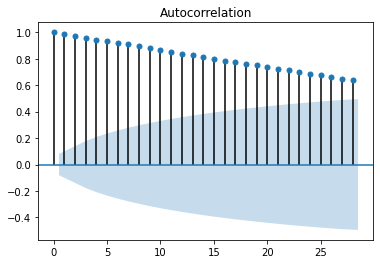

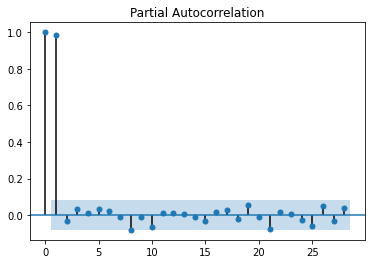

In [ ]:
# plot acf and pacf graph
plot_acf(appl['Close'])
plot_pacf(appl['Close'])
plt.show()

also from ACF and PACF plot data is NON STATIONARY

 CONVERT TO STATIONARY

taking 1st difference

In [ ]:
appl['diff'] = appl['Close'].diff(periods=1)

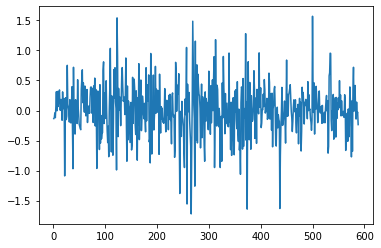

In [ ]:
appl["diff"].plot()

In [ ]:
adf_test('diff')

Results of Dickey-Fuller Test for  diff 

Test Statistic                 -23.776321
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    587.000000
Critical Value (1%)             -3.441539
Critical Value (5%)             -2.866476
Critical Value (10%)            -2.569399
dtype: float64


In [ ]:
kpss_test("diff")

Results of KPSS Test for  diff
Test Statistic            0.088565
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


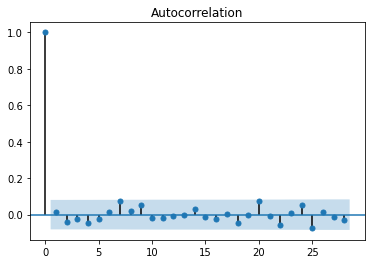

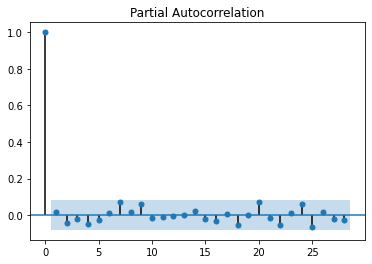

In [ ]:
plot_acf(appl['diff'].dropna())
plot_pacf(appl['diff'].dropna())
plt.show()

from ADF and KPSS test and also from ACF and PACF 

difference data is STATIONARY

 CHECKS FOR OUTLIERS

In [ ]:
def out_iqr(df , column):
  global lower,upper
  q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
  # calculate the IQR
  iqr = q75 - q25
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  # calculate the lower and upper bound value
  lower, upper = q25 - cut_off, q75 + cut_off
  print('The IQR is',iqr)
  print('The lower bound value is', lower)
  print('The upper bound value is', upper)
  # Calculate the number of records below and above lower and above bound value respectively
  df1 = df[df[column] > upper]
  df2 = df[df[column] < lower]
  return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [ ]:
out_iqr(appl,'Close')

The IQR is 4.239999771118164
The lower bound value is 18.97000026702881
The upper bound value is 35.929999351501465
Total number of outliers are 0


 from IQR we get 0 outliers and that can also be seen through box plot

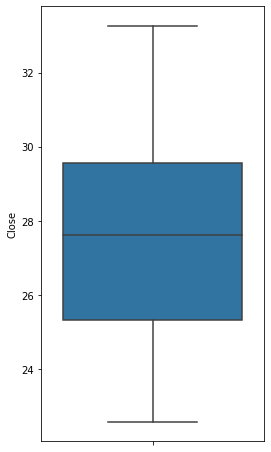

In [ ]:
# box plot
plt.figure(figsize = (4,8))
sns.boxplot(y = appl.Close)

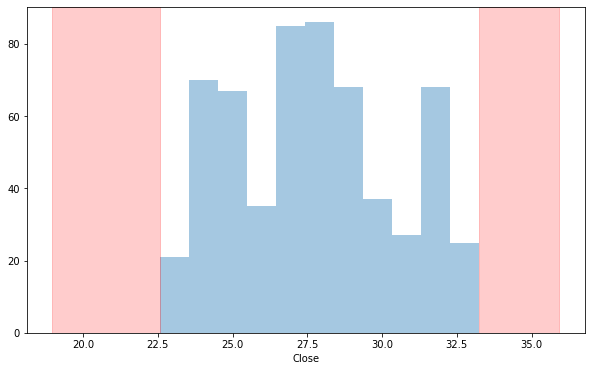

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(appl.Close, kde=False)
plt.axvspan(xmin = lower,xmax= appl.Close.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= appl.Close.max(),alpha=0.2, color='red')

this can also be seen from above plot that no data is in red region means no outliers

## FACEBOOK

 LOAD DATASET

In [ ]:
fb = pdr.DataReader('FB', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))
fb.to_csv('Facebook_stock.csv', sep=',')
fb = fb.reset_index()

In [ ]:
fb.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-08-01,73.220001,71.550003,72.220001,72.360001,43535000,72.360001
1,2014-08-04,73.879997,72.360001,72.360001,73.510002,30777000,73.510002
2,2014-08-05,73.589996,72.180000,73.199997,72.690002,34986000,72.690002
3,2014-08-06,73.720001,71.790001,72.019997,72.470001,30986000,72.470001
4,2014-08-07,74.000000,72.699997,73.000000,73.169998,38141000,73.169998


In [ ]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       589 non-null    datetime64[ns]
 1   High       589 non-null    float64       
 2   Low        589 non-null    float64       
 3   Open       589 non-null    float64       
 4   Close      589 non-null    float64       
 5   Volume     589 non-null    int64         
 6   Adj Close  589 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 32.3 KB


In [ ]:
fb.describe()

,High,Low,Open,Close,Volume,Adj Close
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02,589.000000
mean,98.479779,96.491545,97.527742,97.544160,2.754758e+07,97.544160
std,18.576699,18.438006,18.550756,18.511200,1.396508e+07,18.511200
min,73.220001,70.320000,70.790001,72.360001,5.913100e+06,72.360001
25%,80.000000,78.519997,79.300003,79.330002,1.889710e+07,79.330002
50%,96.099998,93.629997,94.949997,94.970001,2.400390e+07,94.970001
75%,115.010002,113.070000,114.070000,114.190002,3.196100e+07,114.190002
max,133.500000,132.220001,133.500000,133.279999,1.074753e+08,133.279999


 PLOT ALL THE COLUMN

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb25d3bf2d0>,
      dtype=object)

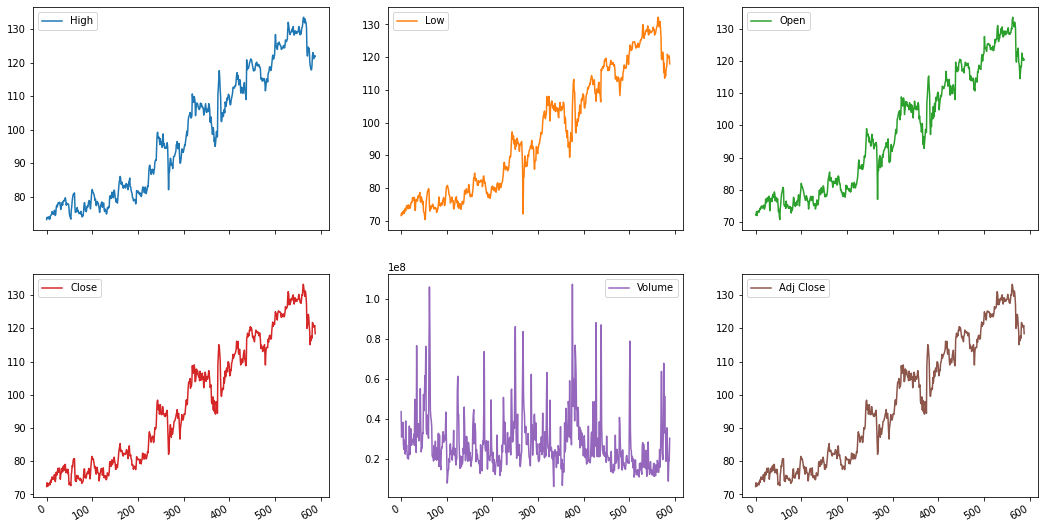

In [ ]:
fb.drop("Date",axis = 1).plot(subplots = True,layout=(2,3),figsize = (18,10))

for analysis of stock price i'm taking close price of stock

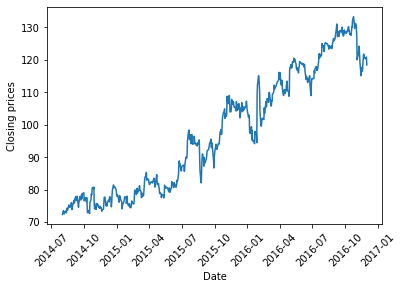

In [ ]:
plt.plot(fb["Date"],fb["Close"])
plt.xlabel('Date')
plt.ylabel('Closing prices')
plt.xticks(rotation=45)
plt.show()

analysing different component of time series

<Figure size 432x288 with 0 Axes>

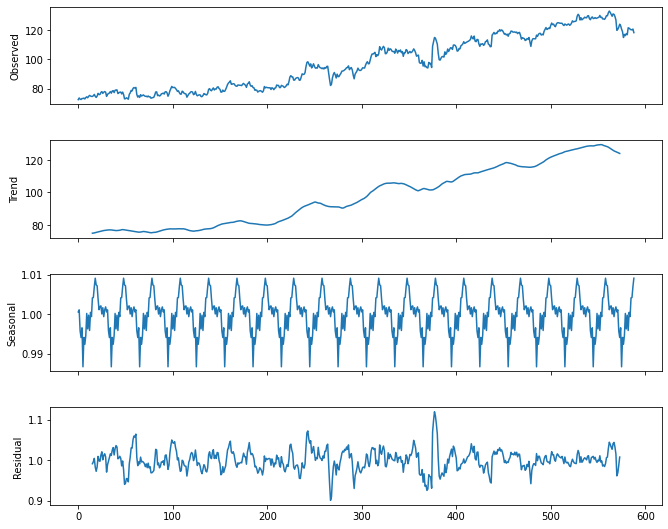

In [ ]:
result = seasonal_decompose(fb["Close"], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(10, 8)

from above plot there is both trend and seasonal component in price

 STATIONARITY CHECKS

In [ ]:
def adf_test(atr):
  timeseries = fb[atr].dropna()
  print ('Results of Dickey-Fuller Test for ',atr,'\n')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

adf_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -0.966644
p-value                          0.765235
#Lags Used                       6.000000
Number of Observations Used    582.000000
Critical Value (1%)             -3.441636
Critical Value (5%)             -2.866519
Critical Value (10%)            -2.569422
dtype: float64


In [ ]:
#define KPSS
def kpss_test(atr,**kw):
  timeseries = fb[atr].dropna()
  print ('Results of KPSS Test for ',atr)
  kpsstest = kpss(timeseries, regression = "ct")
  kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
  for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
  print (kpss_output)
kpss_test('Close')

Results of KPSS Test for  Close
Test Statistic            0.28127
p-value                   0.01000
Lags Used                19.00000
Critical Value (10%)      0.11900
Critical Value (5%)       0.14600
Critical Value (2.5%)     0.17600
Critical Value (1%)       0.21600
dtype: float64


from ADF: p value is greater than 0.05

from KPSS: p value is less than 0.05

hence data is NON STATIONARY

ACF AND PACF PLOTS

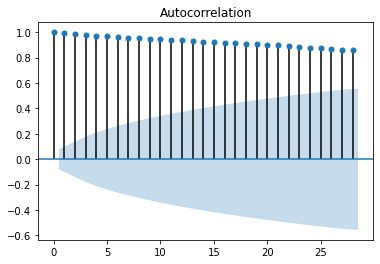

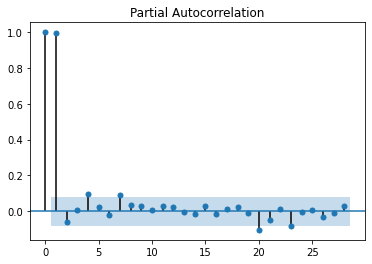

In [ ]:
# plot acf and pacf graph
plot_acf(fb['Close'])
plot_pacf(fb['Close'])
plt.show()

also from ACF and PACF plot data is NON STATIONARY

 CONVERT TO STATIONARY

taking 1st difference

In [ ]:
fb['diff'] = fb['Close'].diff(periods=1)

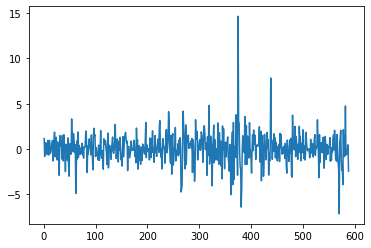

In [ ]:
fb["diff"].plot()

In [ ]:
adf_test('diff')

Results of Dickey-Fuller Test for  diff 

Test Statistic                -1.191784e+01
p-value                        5.114835e-22
#Lags Used                     5.000000e+00
Number of Observations Used    5.820000e+02
Critical Value (1%)           -3.441636e+00
Critical Value (5%)           -2.866519e+00
Critical Value (10%)          -2.569422e+00
dtype: float64


In [ ]:
kpss_test("diff")

Results of KPSS Test for  diff
Test Statistic            0.058239
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


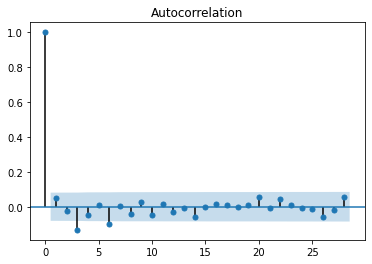

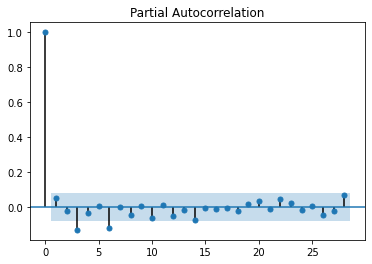

In [ ]:
plot_acf(fb['diff'].dropna())
plot_pacf(fb['diff'].dropna())
plt.show()

from ADF and KPSS test and also from ACF and PACF 

difference data is STATIONARY

 CHECKS FOR OUTLIERS

In [ ]:
def out_iqr(df , column):
  global lower,upper
  q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
  # calculate the IQR
  iqr = q75 - q25
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  # calculate the lower and upper bound value
  lower, upper = q25 - cut_off, q75 + cut_off
  print('The IQR is',iqr)
  print('The lower bound value is', lower)
  print('The upper bound value is', upper)
  # Calculate the number of records below and above lower and above bound value respectively
  df1 = df[df[column] > upper]
  df2 = df[df[column] < lower]
  return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [ ]:
out_iqr(fb,'Close')

The IQR is 34.86000061035156
The lower bound value is 27.040000915527344
The upper bound value is 166.4800033569336
Total number of outliers are 0


 from IQR we get 0 outliers and that can also be seen through box plot

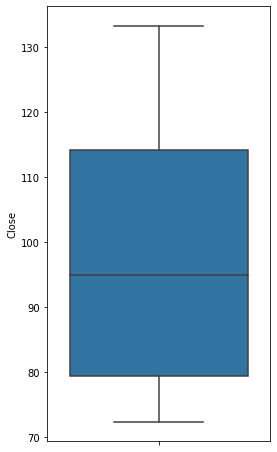

In [ ]:
# box plot
plt.figure(figsize = (4,8))
sns.boxplot(y = fb.Close)

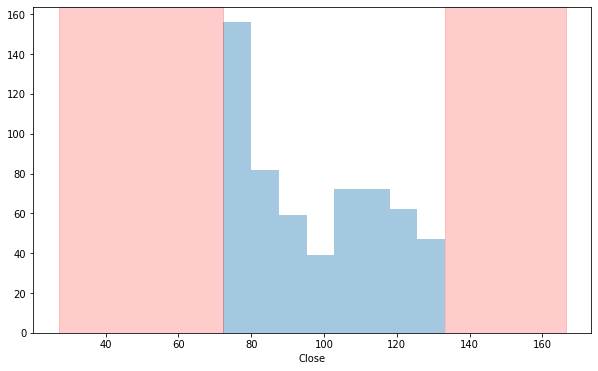

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(fb.Close, kde=False)
plt.axvspan(xmin = lower,xmax= fb.Close.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= fb.Close.max(),alpha=0.2, color='red')

no data under red region means no outlier in data

## GOOGLE

 LOAD DATASET

In [ ]:
googl = pdr.DataReader('GOOGL', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))
googl.to_csv('Googl_stock.csv', sep=',')
googl = googl.reset_index()

In [ ]:
googl.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-08-01,583.429993,570.299988,578.549988,573.599976,2213300,573.599976
1,2014-08-04,583.820007,572.260010,576.510010,582.270020,1519400,582.270020
2,2014-08-05,580.200012,570.309998,579.380005,573.140015,1643800,573.140015
3,2014-08-06,578.640015,567.450012,569.500000,574.489990,1322800,574.489990
4,2014-08-07,578.309998,569.429993,576.049988,571.809998,1163000,571.809998


In [ ]:
googl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       589 non-null    datetime64[ns]
 1   High       589 non-null    float64       
 2   Low        589 non-null    float64       
 3   Open       589 non-null    float64       
 4   Close      589 non-null    float64       
 5   Volume     589 non-null    int64         
 6   Adj Close  589 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 32.3 KB


In [ ]:
googl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02,589.000000
mean,670.241070,658.717657,664.847572,664.520458,2.059138e+06,664.520458
std,101.589772,100.188867,100.998646,100.889144,1.074884e+06,100.889144
min,500.279999,490.910004,499.239990,497.059998,5.206000e+05,497.059998
25%,561.109985,552.260010,558.000000,556.809998,1.447600e+06,556.809998
50%,692.260010,673.679993,683.729980,681.140015,1.769100e+06,681.140015
75%,763.229980,751.570007,757.520020,757.650024,2.345900e+06,757.650024
max,839.000000,829.039978,838.500000,835.739990,1.285810e+07,835.739990


 PLOT ALL THE COLUMN

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb25cd7ecd0>,
      dtype=object)

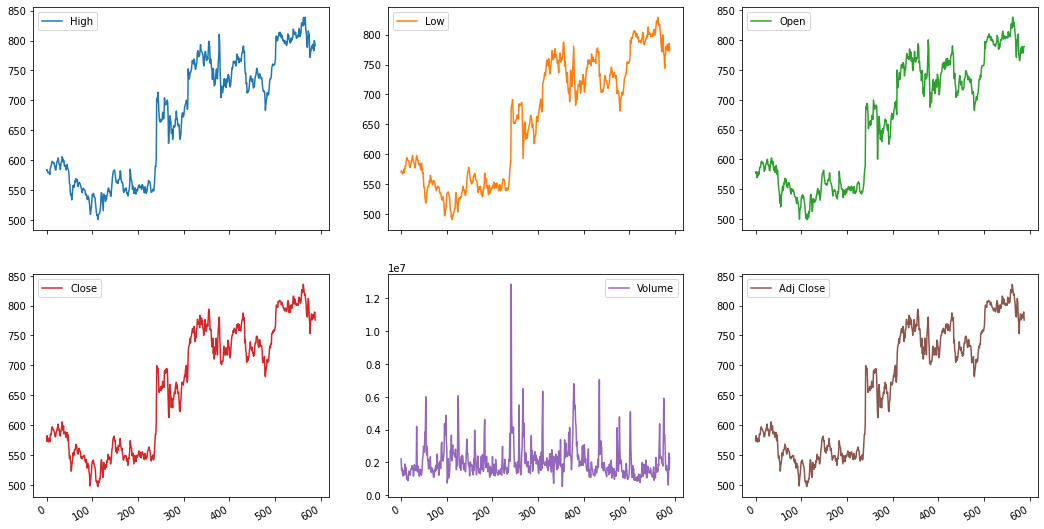

In [ ]:
googl.drop("Date",axis = 1).plot(subplots = True,layout=(2,3),figsize = (18,10))

for analysis of stock price i'm taking close price of stock

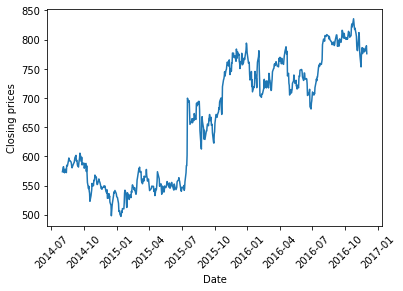

In [ ]:
plt.plot(googl["Date"],googl["Close"])
plt.xlabel('Date')
plt.ylabel('Closing prices')
plt.xticks(rotation=45)
plt.show()

analysing different component of time series

<Figure size 432x288 with 0 Axes>

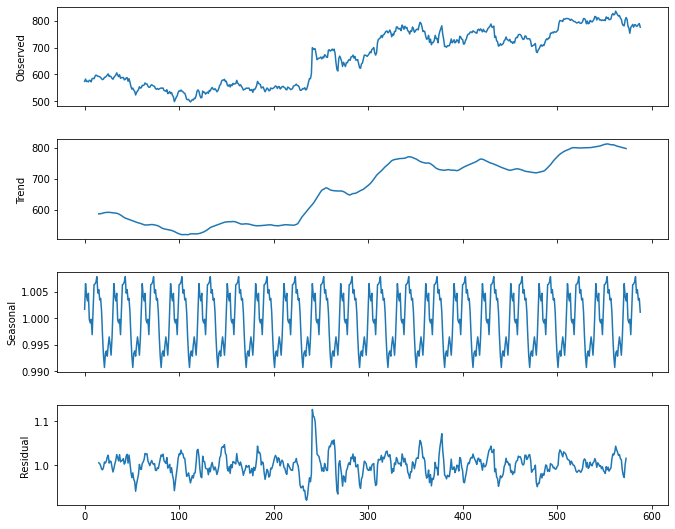

In [ ]:
result = seasonal_decompose(googl["Close"], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(10, 8)

from above plot there is both trend and seasonal component in price

 STATIONARITY CHECKS

In [ ]:
def adf_test(atr):
  timeseries = googl[atr].dropna()
  print ('Results of Dickey-Fuller Test for ',atr,'\n')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

adf_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -1.092577
p-value                          0.718023
#Lags Used                       3.000000
Number of Observations Used    585.000000
Critical Value (1%)             -3.441578
Critical Value (5%)             -2.866493
Critical Value (10%)            -2.569408
dtype: float64


In [ ]:
#define KPSS
def kpss_test(atr,**kw):
  timeseries = googl[atr].dropna()
  print ('Results of KPSS Test for ',atr)
  kpsstest = kpss(timeseries, regression = "ct")
  kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
  for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
  print (kpss_output)
kpss_test('Close')

Results of KPSS Test for  Close
Test Statistic            0.232866
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


from ADF: p value is greater than 0.05

from KPSS: p value is less than 0.05

hence data is NON STATIONARY

ACF AND PACF PLOTS

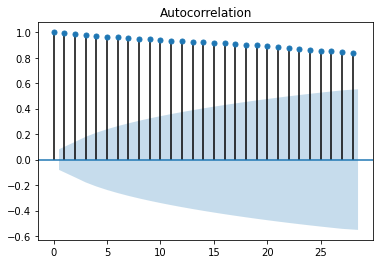

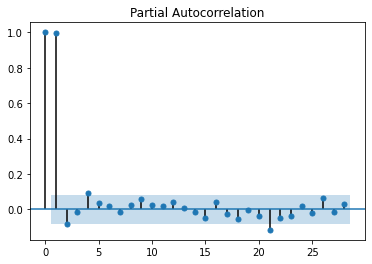

In [ ]:
# plot acf and pacf graph
plot_acf(googl['Close'])
plot_pacf(googl['Close'])
plt.show()

also from ACF and PACF plot data is NON STATIONARY

CONVERT TO STATIONARY

taking 1st difference

In [ ]:
googl['diff'] = googl['Close'].diff(periods=1)

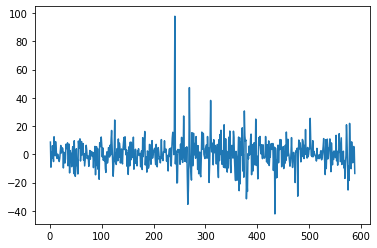

In [ ]:
googl["diff"].plot()

In [ ]:
adf_test('diff')

Results of Dickey-Fuller Test for  diff 

Test Statistic                -1.479016e+01
p-value                        2.177423e-27
#Lags Used                     2.000000e+00
Number of Observations Used    5.850000e+02
Critical Value (1%)           -3.441578e+00
Critical Value (5%)           -2.866493e+00
Critical Value (10%)          -2.569408e+00
dtype: float64


In [ ]:
kpss_test("diff")

Results of KPSS Test for  diff
Test Statistic            0.070262
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64


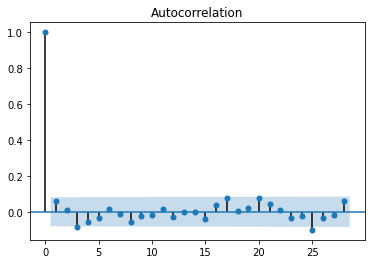

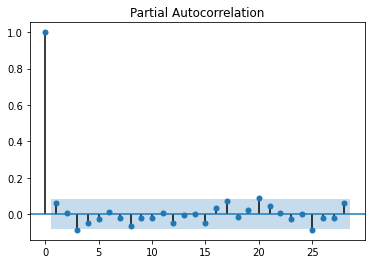

In [ ]:
plot_acf(googl['diff'].dropna())
plot_pacf(googl['diff'].dropna())
plt.show()

from ADF and KPSS test and also from ACF and PACF 

difference data is STATIONARY

 CHECKS FOR OUTLIERS

In [ ]:
def out_iqr(df , column):
  global lower,upper
  q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
  # calculate the IQR
  iqr = q75 - q25
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  # calculate the lower and upper bound value
  lower, upper = q25 - cut_off, q75 + cut_off
  print('The IQR is',iqr)
  print('The lower bound value is', lower)
  print('The upper bound value is', upper)
  # Calculate the number of records below and above lower and above bound value respectively
  df1 = df[df[column] > upper]
  df2 = df[df[column] < lower]
  return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [ ]:
out_iqr(googl,'Close')

The IQR is 200.84002685546875
The lower bound value is 255.54995727539062
The upper bound value is 1058.9100646972656
Total number of outliers are 0


 from IQR we get 0 outliers and that can also be seen through box plot

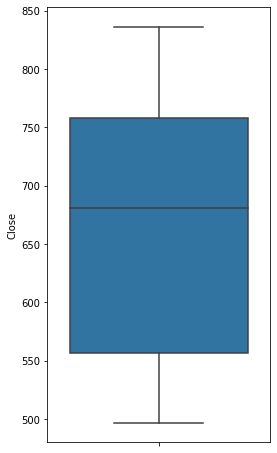

In [ ]:
# box plot
plt.figure(figsize = (4,8))
sns.boxplot(y = googl.Close)

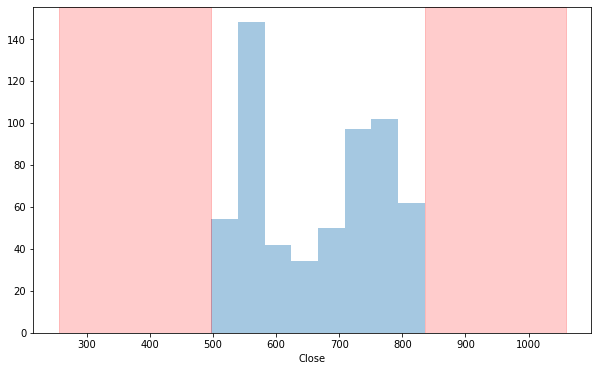

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(googl.Close, kde=False)
plt.axvspan(xmin = lower,xmax= googl.Close.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= googl.Close.max(),alpha=0.2, color='red')

no data under red region so no outlier in data